### Content-based recommendation
 
    suggests items to a user based on the features of items they have previously liked. It compares item attributes (like genre, keywords, etc.) with user preferences to recommend similar items.
    
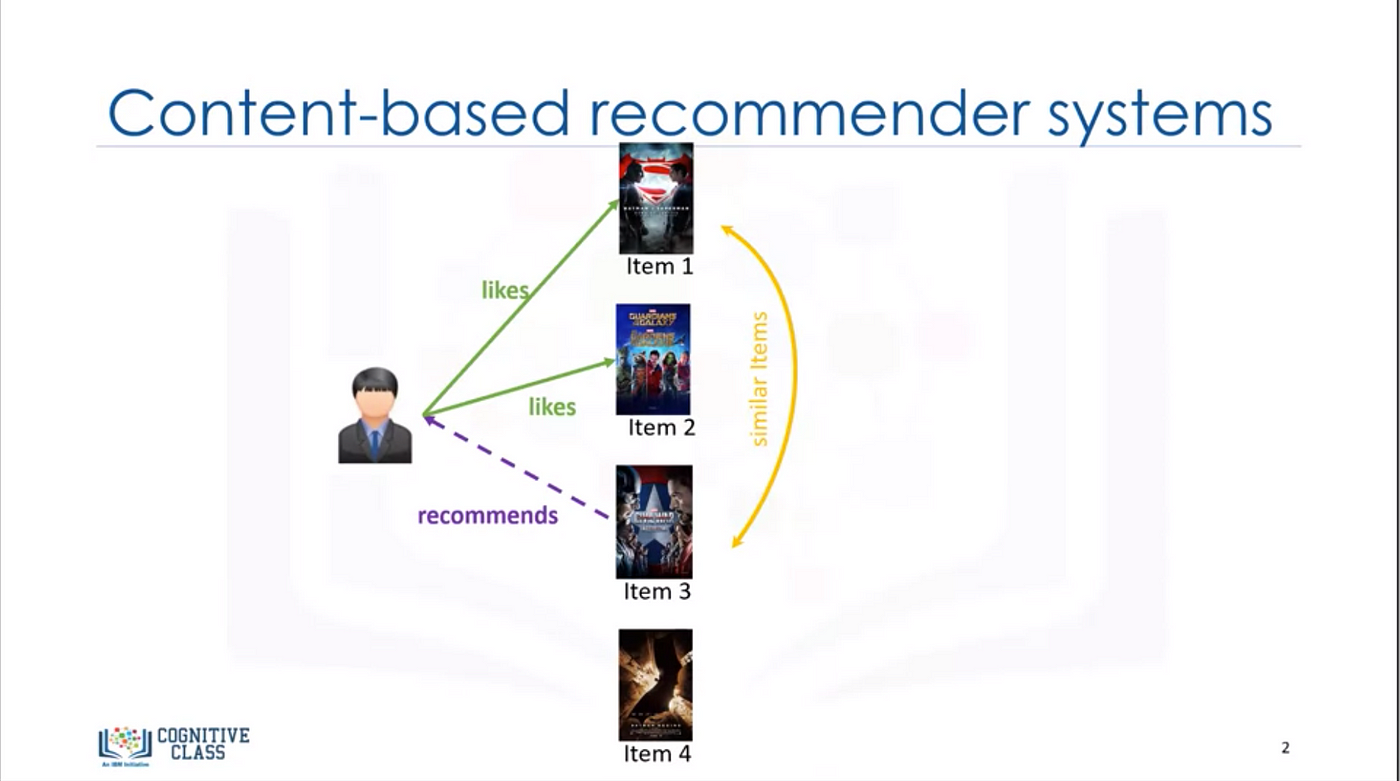
    
    
    
### Cosine similarity
   
    measures the angle between two non-zero vectors in a multi-dimensional space to determine how similar they are. It ranges from -1 (opposite) to 1 (identical), often used in text and recommendation systems to compare item or user profiles    
    
    
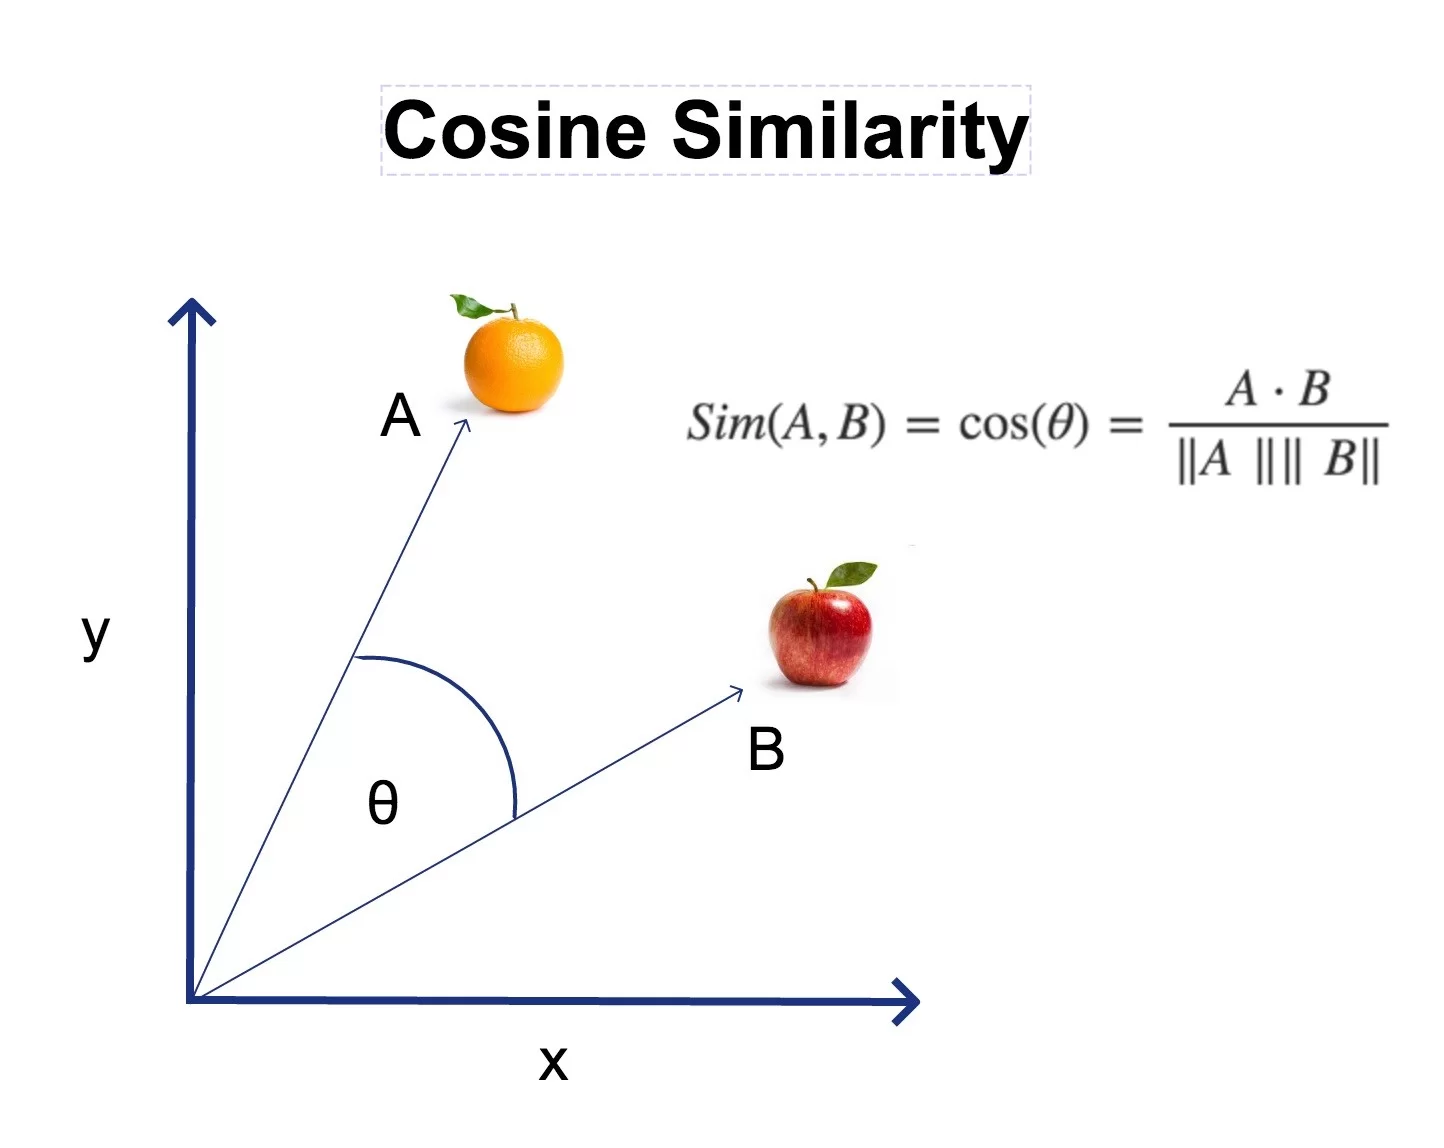
    
    
    

#  Load dataset

In [10]:
import pandas as pd

df = pd.read_csv("lec 32, clean_data.csv")

In [11]:
df = df[['ID','ProdID','Rating','Category','Brand','Name','ImageURL','Tags']]
df.head()

,ID,ProdID,Rating,Category,Brand,Name,ImageURL,Tags
0,1705736792,2,0.0,"premium, beauty, premium, makeup, premium, nai...",opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,"premium, beauty, premium, makeup, premium, nai..."
1,95,76,0.0,"beauty, hair, care, hair, color, auburn, hair,...",easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"beauty, hair, care, hair, color, auburn, hair,..."
2,8,8,4.5,"beauty, hair, care, hair, color, permanent, ha...",clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,"beauty, hair, care, hair, color, permanent, ha..."
3,4,3,0.0,"beauty, makeup, lip","kokie, cosmetics","Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,"beauty, makeup, lip, kokie, cosmetics, calling..."
4,990,3,0.0,"seasonal, stock, essentials, personal, care, s...",gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"seasonal, stock, essentials, personal, care, s..."


#  Content-Based Filtering Model

In [12]:
# ---------------------------
#  TF-IDF Vectorization
# ---------------------------
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, min_df=5, ngram_range=(1,2))
tfidf_matrix = vectorizer.fit_transform(df['Tags'])

# ---------------------------
#  Cosine Similarity Matrix
# ---------------------------
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Reset index to get clean mapping
df = df.reset_index(drop=True)

# Real Time Recommendation

In [14]:
# ---------------------------
#  Recommendation Function
# ---------------------------
def content_base_rec(title_query, top_n=10):
    title_query = title_query.lower()

    # Vectorize input title
    title_vec = vectorizer.transform([title_query])

    # Compute cosine similarity
    sim_scores = cosine_similarity(title_vec, tfidf_matrix).flatten()

    # Get top N indices
    top_indices = sim_scores.argsort()[::-1][:top_n]

    return df.loc[top_indices, ['Name','Rating','Brand','ImageURL']]


content_base_rec("nail polish")


,Name,Rating,Brand,ImageURL
1660,Sally Hansen Miracle Gel Nail Color Polish Sma...,4.2,"sally, hansen",https://i5.walmartimages.com/asr/dcac19a4-d67e...
2455,Gel Polish: Lechat Nobility Perfect Match Nail...,0.0,lechat,https://i5.walmartimages.com/asr/a6099391-cdc9...
3608,SpaRitual Nourishing Vegan Nail Lacquer &quotB...,3.0,sparitual,https://i5.walmartimages.com/asr/24e1bc6c-f46a...
3687,"Fingrs Nailene Full Cover Nails, Active Square...",0.0,nailene,https://i5.walmartimages.com/asr/c80e7b42-dcc4...
2136,SpaRitual Nourishing Vegan Nail Lacquer &quotA...,3.0,sparitual,https://i5.walmartimages.com/asr/ea0058d3-44e2...
2775,LECHAT Soak off Gel Mood Changing Color - MPMG...,0.0,lechat,https://i5.walmartimages.com/asr/21b9b68c-5b96...
2474,SpaRitual Nourishing Vegan Nail Lacquer &quotL...,3.0,sparitual,https://i5.walmartimages.com/asr/e209856d-d73b...
593,LECHAT Soak off Gel Mood Changing Color - MPMG...,2.0,lechat,https://i5.walmartimages.com/asr/c4c663d3-c14a...
1659,LECHAT Soak off Gel Mood Changing Color - MPMG...,2.0,lechat,https://i5.walmartimages.com/asr/8ba405ee-7458...
2127,"Karma Organic Nail Polish; Non-Toxic, Vegan, a...",5.0,"karma, organic",https://i5.walmartimages.com/asr/eb62b5d5-b2aa...
